In [327]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import AnovaRM

In [328]:
means = {'wg': [], 'wr': [], 'bg': [], 'br': []}
means_extra = {'wg': [], 'wr': [], 'bg': [], 'br': [], 'age': [], 'gender': [], 'education': [], 'lit_q1':[], 'lit_q2':[], 'lit_q3':[], 'lit_q4':[], 'lit_q5':[]}

# Create a DataFrame from the dictionary
means_q1 = pd.DataFrame(means)
means_q1_extra = pd.DataFrame(means_extra)

In [329]:
#data = pd.read_csv("data/_BZ_2023-02-28_13h59.53.781.csv")

In [330]:
responses_q1 = data[["question", "item_no", "file_path", "slider.response"]]
responses_q1 = responses_q1[~responses_q1['slider.response'].isnull()]

In [331]:
responses_q1

,question,item_no,file_path,slider.response
24,How severe is Covid 19 in this region?,24.0,map_generator/charts/24wr.png,1.312963
25,How severe is Covid 19 in this region?,19.0,map_generator/charts/19bg.png,1.337037
26,How severe is Covid 19 in this region?,10.0,map_generator/charts/10br.png,1.464815
27,How severe is Covid 19 in this region?,48.0,map_generator/charts/48wr.png,1.014815
28,How severe is Covid 19 in this region?,15.0,map_generator/charts/15bg.png,1.464815
29,How severe is Covid 19 in this region?,20.0,map_generator/charts/20wr.png,1.096296
30,How severe is Covid 19 in this region?,41.0,map_generator/charts/41wg.png,1.144444
31,How severe is Covid 19 in this region?,4.0,map_generator/charts/4wr.png,1.229630
32,How severe is Covid 19 in this region?,47.0,map_generator/charts/47bg.png,1.209259
33,How severe is Covid 19 in this region?,27.0,map_generator/charts/27bg.png,1.229630


In [332]:
# check if each value in the 'text' column contains 'wg'
contains_wg = responses_q1['file_path'].str.contains('wg')
print(responses_q1[contains_wg])

# check if each value in the 'text' column contains 'wr'
contains_wr = responses_q1['file_path'].str.contains('wr')
print(responses_q1[contains_wr])

# check if each value in the 'text' column contains 'bg'
contains_bg = responses_q1['file_path'].str.contains('bg')
print(responses_q1[contains_bg])

# check if each value in the 'text' column contains 'br'
contains_br = responses_q1['file_path'].str.contains('br')
print(responses_q1[contains_br])

                                  question  item_no  \
30  How severe is Covid 19 in this region?     41.0   
36  How severe is Covid 19 in this region?     29.0   
37  How severe is Covid 19 in this region?     13.0   
40  How severe is Covid 19 in this region?     45.0   
44  How severe is Covid 19 in this region?      1.0   
46  How severe is Covid 19 in this region?     37.0   
48  How severe is Covid 19 in this region?     49.0   
54  How severe is Covid 19 in this region?      5.0   
56  How severe is Covid 19 in this region?     33.0   
57  How severe is Covid 19 in this region?     25.0   
69  How severe is Covid 19 in this region?      9.0   
70  How severe is Covid 19 in this region?     21.0   
72  How severe is Covid 19 in this region?     17.0   

                        file_path  slider.response  
30  map_generator/charts/41wg.png         1.144444  
36  map_generator/charts/29wg.png         1.316667  
37  map_generator/charts/13wg.png         1.251852  
40  map_generator

In [333]:
avg_wg = responses_q1[contains_wg]['slider.response'].mean()
print(avg_wg)

avg_wr = responses_q1[contains_wr]['slider.response'].mean()
print(avg_wr)

avg_bg = responses_q1[contains_bg]['slider.response'].mean()
print(avg_bg)

avg_br = responses_q1[contains_br]['slider.response'].mean()
print(avg_br)

1.3740741176153846
1.1901235015833336
1.3603395814166666
1.321225119076923


In [334]:
# make row to add to df
new_row = pd.DataFrame({'wg': [avg_wg], 'wr': [avg_wr], 'bg': [avg_bg], 'br': [avg_br]})

means_q1 = pd.concat([means_q1, new_row], ignore_index=True)
means_q1

,wg,wr,bg,br
0,1.374074,1.190124,1.36034,1.321225


In [335]:
means_q1 = pd.DataFrame(means)

files = glob.glob("data/*.csv")

for f in files:
    data = pd.read_csv(f)
    
    responses_q1 = data[["question", "item_no", "file_path", "slider.response"]]
    responses_q1 = responses_q1[~responses_q1['slider.response'].isnull()]
    responses_q1
    
    demographics_age = data[["ageResp.text", "genderResp1.response"]]
    demographics_age = demographics_age[~demographics_age['ageResp.text'].isnull()]
    "q1_slider.response", "q2_slider.response", "q3_slider.response", "q4_slider.response", "q5_slider.response"
    
    demographics_education = data[["edu_slider.response"]]
    demographics_education = demographics_education[~demographics_education['edu_slider.response'].isnull()]
    
    demographics_literacy = data[["q1_slider.response", "q2_slider.response", "q3_slider.response", "q4_slider.response", "q5_slider.response"]]
    demographics_literacy = demographics_literacy[~demographics_literacy['q1_slider.response'].isnull()]
    
    # check if each value in the 'text' column contains 'wg'
    contains_wg = responses_q1['file_path'].str.contains('wg')
    print(responses_q1[contains_wg])

    # check if each value in the 'text' column contains 'wr'
    contains_wr = responses_q1['file_path'].str.contains('wr')
    print(responses_q1[contains_wr])

    # check if each value in the 'text' column contains 'bg'
    contains_bg = responses_q1['file_path'].str.contains('bg')
    print(responses_q1[contains_bg])

    # check if each value in the 'text' column contains 'br'
    contains_br = responses_q1['file_path'].str.contains('br')
    print(responses_q1[contains_br])
    
    
    avg_wg = responses_q1[contains_wg]['slider.response'].mean()
    print(avg_wg)

    avg_wr = responses_q1[contains_wr]['slider.response'].mean()
    print(avg_wr)

    avg_bg = responses_q1[contains_bg]['slider.response'].mean()
    print(avg_bg)

    avg_br = responses_q1[contains_br]['slider.response'].mean()
    print(avg_br)
    
    # make row to add to df
    new_row = pd.DataFrame({'wg': [avg_wg], 'wr': [avg_wr], 'bg': [avg_bg], 'br': [avg_br]})
    new_row_extra = pd.DataFrame({'wg': [avg_wg], 'wr': [avg_wr], 'bg': [avg_bg], 'br': [avg_br], 'age': [demographics_age['ageResp.text'].mean()], 'gender': [demographics_age["genderResp1.response"].mean()], 'education': [demographics_education["edu_slider.response"].mean()], 'lit_q1':[demographics_literacy["q1_slider.response"].mean()], 'lit_q2':[demographics_literacy["q2_slider.response"].mean()], 'lit_q3':[demographics_literacy["q3_slider.response"].mean()], 'lit_q4':[demographics_literacy["q4_slider.response"].mean()], 'lit_q5':[demographics_literacy["q5_slider.response"].mean()] })

    means_q1 = pd.concat([means_q1, new_row], ignore_index=True)
    means_q1_extra = pd.concat([means_q1_extra, new_row_extra], ignore_index=True)

                                  question  item_no  \
26  How severe is Covid 19 in this region?     15.0   
29  How severe is Covid 19 in this region?     11.0   
35  How severe is Covid 19 in this region?     43.0   
36  How severe is Covid 19 in this region?     19.0   
39  How severe is Covid 19 in this region?     31.0   
41  How severe is Covid 19 in this region?     39.0   
46  How severe is Covid 19 in this region?     35.0   
48  How severe is Covid 19 in this region?     47.0   
49  How severe is Covid 19 in this region?      3.0   
50  How severe is Covid 19 in this region?     23.0   
56  How severe is Covid 19 in this region?      7.0   
59  How severe is Covid 19 in this region?     27.0   

                        file_path  slider.response  
26  map_generator/charts/15wg.png         1.810185  
29  map_generator/charts/11wg.png         1.335648  
35  map_generator/charts/43wg.png         1.516204  
36  map_generator/charts/19wg.png         1.078704  
39  map_generator/c

                                  question  item_no  \
28  How severe is Covid 19 in this region?     37.0   
29  How severe is Covid 19 in this region?     25.0   
36  How severe is Covid 19 in this region?     45.0   
38  How severe is Covid 19 in this region?     13.0   
39  How severe is Covid 19 in this region?      5.0   
42  How severe is Covid 19 in this region?     49.0   
47  How severe is Covid 19 in this region?     33.0   
56  How severe is Covid 19 in this region?     41.0   
57  How severe is Covid 19 in this region?      1.0   
59  How severe is Covid 19 in this region?     29.0   
61  How severe is Covid 19 in this region?     17.0   
62  How severe is Covid 19 in this region?     21.0   
65  How severe is Covid 19 in this region?      9.0   

                        file_path  slider.response  
28  map_generator/charts/37wg.png         1.594950  
29  map_generator/charts/25wg.png         1.623232  
36  map_generator/charts/45wg.png         1.601010  
38  map_generator

In [336]:
demographics_age

,ageResp.text,genderResp1.response
13,44.0,4.0


In [337]:
demographics_education

,edu_slider.response
14,3.0


In [338]:
demographics_literacy

,q1_slider.response,q2_slider.response,q3_slider.response,q4_slider.response,q5_slider.response
15,6.0,6.0,6.0,6.0,6.0


In [339]:
means_q1

,wg,wr,bg,br
0,1.538580,1.561254,1.432158,1.476466
1,1.262678,1.093519,1.190123,1.287037
2,1.647377,1.441512,1.487179,1.401425
3,1.655093,1.667806,1.623219,1.475617
4,1.451080,1.590432,1.574644,1.583476
5,1.290586,1.470062,1.420798,1.451709
6,1.648611,1.583013,1.353704,1.649537
7,1.533775,1.381823,1.546553,1.487298
8,1.336728,1.572840,1.562821,1.630484
9,1.505409,1.527244,1.263455,1.529948


In [340]:
means_q1_extra

,wg,wr,bg,br,age,gender,education,lit_q1,lit_q2,lit_q3,lit_q4,lit_q5
0,1.538580,1.561254,1.432158,1.476466,24.0,4.0,6.0,5.0,5.0,5.0,5.0,5.0
1,1.262678,1.093519,1.190123,1.287037,52.0,4.0,3.0,6.0,6.0,6.0,6.0,6.0
2,1.647377,1.441512,1.487179,1.401425,21.0,4.0,6.0,5.0,6.0,4.0,6.0,6.0
3,1.655093,1.667806,1.623219,1.475617,23.0,2.0,6.0,5.0,5.0,5.0,4.0,5.0
4,1.451080,1.590432,1.574644,1.583476,21.0,4.0,4.0,5.0,6.0,6.0,5.0,6.0
5,1.290586,1.470062,1.420798,1.451709,22.0,4.0,6.0,5.0,5.0,5.0,5.0,5.0
6,1.648611,1.583013,1.353704,1.649537,21.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0
7,1.533775,1.381823,1.546553,1.487298,22.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0
8,1.336728,1.572840,1.562821,1.630484,21.0,4.0,6.0,4.0,3.0,4.0,4.0,4.0
9,1.505409,1.527244,1.263455,1.529948,22.0,5.0,4.0,4.0,3.0,4.0,3.0,3.0


In [341]:
means_q1_extra.describe()

,wg,wr,bg,br,age,gender,education,lit_q1,lit_q2,lit_q3,lit_q4,lit_q5
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1.459174,1.431055,1.425685,1.445161,29.583333,4.250000,4.416667,4.791667,4.750000,4.708333,4.666667,4.791667
std,0.139052,0.174423,0.153646,0.159214,12.257798,0.675664,1.248187,0.977093,1.151558,1.122078,1.129319,1.062367
min,1.262678,1.093519,1.122377,1.143210,17.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
25%,1.338028,1.339666,1.348393,1.362598,21.750000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,1.453862,1.423148,1.400924,1.450546,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.542860,1.564150,1.550620,1.515509,40.250000,5.000000,6.000000,5.250000,6.000000,6.000000,6.000000,6.000000
max,1.780625,1.858077,1.730385,1.895833,54.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


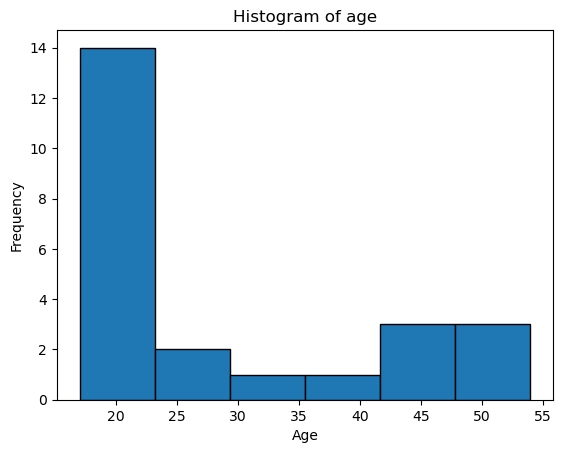

In [342]:
# Choose the column you want to plot
column_to_plot = 'age'

# Plot the histogram
plt.hist(means_q1_extra[column_to_plot], bins='auto', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_to_plot}')

# Show the plot
plt.show()

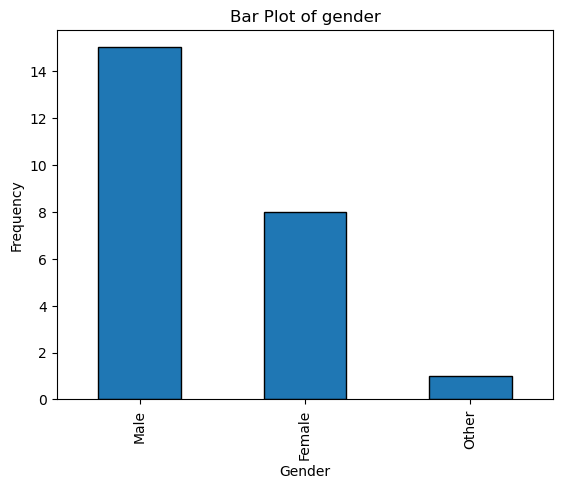

In [343]:
# Choose the column you want to plot
column_to_plot = 'gender'

# Create a mapping of numeric values to gender names
gender_mapping = {2.0: 'Other', 4.0: 'Male', 5.0: 'Female'}

# Calculate the frequency of each value
value_counts = means_q1_extra['gender'].value_counts()

# Replace numeric values with gender names using the mapping
value_counts.index = [gender_mapping[gender] for gender in value_counts.index]

# Plot the bar plot
value_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title(f'Bar Plot of {column_to_plot}')

# Show the plot
plt.show()

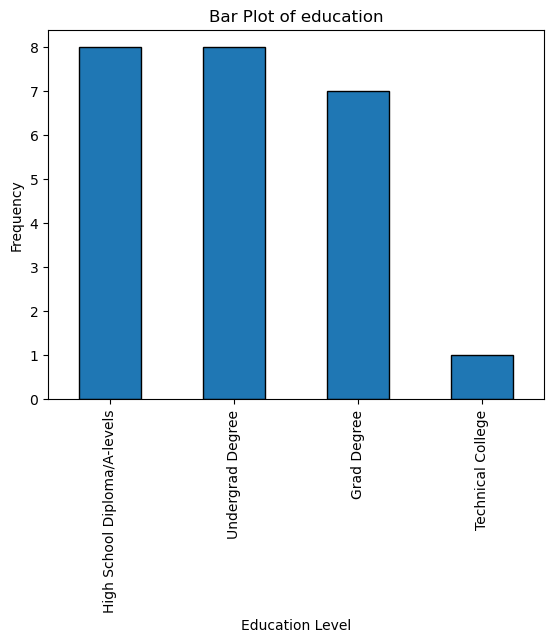

In [344]:
# Choose the column you want to plot
column_to_plot = 'education'

# Create a mapping of numeric values to gender names
education_mapping = {3.0: 'Grad Degree', 4.0: 'Undergrad Degree', 5.0: 'Technical College', 6.0: 'High School Diploma/A-levels'}

# Calculate the frequency of each value
value_counts = means_q1_extra['education'].value_counts()

# Replace numeric values with gender names using the mapping
value_counts.index = [education_mapping[education] for education in value_counts.index]

# Plot the bar plot
value_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title(f'Bar Plot of {column_to_plot}')

# Show the plot
plt.show()

In [345]:
means_q1_transposed = means_q1.transpose()

# rename the unnamed column to 'group'
#means_q1_transposed.index.name = 'group'

means_q1_transposed = means_q1_transposed.reset_index()

means_q1 = means_q1_transposed.rename(columns={'index': 'group'})

means_q1

means_q1 = pd.melt(means_q1, id_vars=['group'], value_vars=[0,1,2,3,4,5,6], var_name='col', value_name='value')

means_q1['value'] = means_q1['value'] - 1

means_q1

,group,col,value
0,wg,0,0.538580
1,wr,0,0.561254
2,bg,0,0.432158
3,br,0,0.476466
4,wg,1,0.262678
5,wr,1,0.093519
6,bg,1,0.190123
7,br,1,0.287037
8,wg,2,0.647377
9,wr,2,0.441512


In [346]:
grouped_data = means_q1.groupby('group')
grouped_data
group_means = grouped_data['value'].mean()
group_errors = grouped_data['value'].std()
group_means

group
bg    0.440261
br    0.475038
wg    0.499144
wr    0.486800
Name: value, dtype: float64

Text(0.5, 1.0, 'Mean Perceived Severity and SDs by Colour Group')

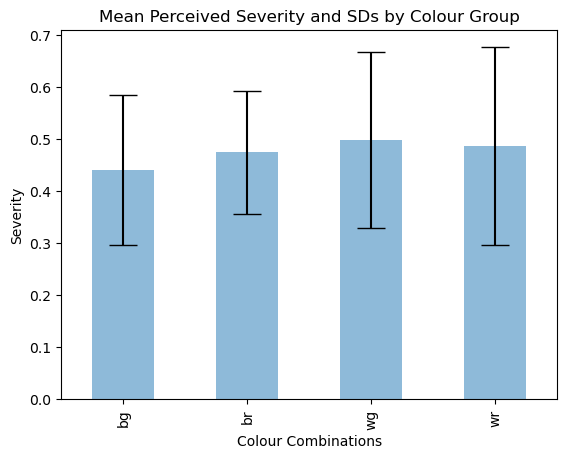

In [347]:
group_means.plot(kind = 'bar', yerr = group_errors, alpha = 0.5, capsize = 10)
plt.xlabel('Colour Combinations')
plt.ylabel('Severity')
plt.title('Mean Perceived Severity and SDs by Colour Group')

In [348]:
group_errors

group
bg    0.143898
br    0.117982
wg    0.169269
wr    0.189431
Name: value, dtype: float64

In [349]:
# Split the 'two_letters' column into two separate columns
means_q1['background'] = means_q1['group'].str[0]
means_q1['line'] = means_q1['group'].str[1]

means_q1 = means_q1.drop('group', axis=1)

means_q1

,col,value,background,line
0,0,0.538580,w,g
1,0,0.561254,w,r
2,0,0.432158,b,g
3,0,0.476466,b,r
4,1,0.262678,w,g
5,1,0.093519,w,r
6,1,0.190123,b,g
7,1,0.287037,b,r
8,2,0.647377,w,g
9,2,0.441512,w,r


In [350]:
grouped_data = means_q1.groupby(['background', 'line'])
group_means = grouped_data['value'].mean()
group_errors_2 = grouped_data['value'].std()
group_means

background  line
b           g       0.440261
            r       0.475038
w           g       0.499144
            r       0.486800
Name: value, dtype: float64

In [351]:
group_means = grouped_data.mean()
pd.DataFrame(group_means)

value
background line          
b          g     0.440261
           r     0.475038
w          g     0.499144
           r     0.486800

In [352]:
data_to_plot = pd.DataFrame(group_means).reset_index()
data_to_plot

,background,line,value
0,b,g,0.440261
1,b,r,0.475038
2,w,g,0.499144
3,w,r,0.486800


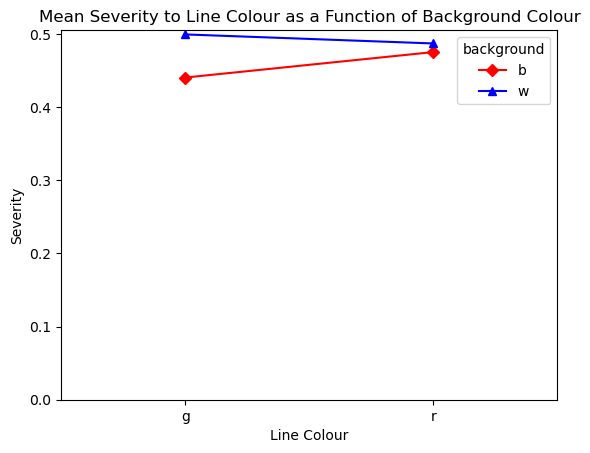

In [353]:
my_interaction_plot = interaction_plot(x=data_to_plot['line'], trace=data_to_plot['background'], 
                                       response=data_to_plot['value'], colors=['red', 'blue'], 
                                       markers=['D', '^'])
plt.xlabel('Line Colour')
plt.ylabel('Severity')
plt.title('Mean Severity to Line Colour as a Function of Background Colour')
plt.ylim(0)
plt.margins(.5, 1)

In [354]:
factorial_model = AnovaRM(data=means_q1, depvar='value', within=['background', 'line'], subject='col').fit()
print(factorial_model)

                   Anova
                F Value Num DF Den DF Pr > F
--------------------------------------------
background       1.1339 1.0000 6.0000 0.3279
line             0.0924 1.0000 6.0000 0.7714
background:line  0.3511 1.0000 6.0000 0.5751



In [355]:
index = (means_q1['background']=='b') & (means_q1['line']=='g')
BG = means_q1[index]['value']

In [356]:
index = (means_q1['background']=='w') & (means_q1['line']=='g')
WG = means_q1[index]['value']

In [357]:
index = (means_q1['background']=='b') & (means_q1['line']=='r')
BR = means_q1[index]['value']

In [358]:
index = (means_q1['background']=='w') & (means_q1['line']=='r')
WR = means_q1[index]['value']

In [359]:
stats.ttest_rel(BG, WG)

Ttest_relResult(statistic=-1.0265301645130729, pvalue=0.34423432545585814)

In [360]:
stats.ttest_rel(BR, WR) 

Ttest_relResult(statistic=-0.2583841409279833, pvalue=0.8047453775599305)

In [361]:
stats.ttest_rel(WG, WR)

Ttest_relResult(statistic=0.22489006110408288, pvalue=0.829528255527989)

In [362]:
stats.ttest_rel(BG, BR)

Ttest_relResult(statistic=-0.6490566561433049, pvalue=0.5403352293165644)

In [363]:
stats.ttest_rel(WG, BR)

Ttest_relResult(statistic=0.4227170548920504, pvalue=0.6872323297371836)

In [364]:
stats.ttest_rel(BG, WR)

Ttest_relResult(statistic=-1.1385856041761386, pvalue=0.2982864245360696)

In [365]:
responses_q2 = data[["question2", "file_path2", "slider_2.response"]]
responses_q2 = responses_q2[~responses_q2['slider_2.response'].isnull()]

In [366]:
responses_q2

,question2,file_path2,slider_2.response
74,How appropriate are the colours of the graph?,map_generator/charts/1wr.png,1.383333
75,How appropriate are the colours of the graph?,map_generator/charts/1wg.png,1.383333
76,How appropriate are the colours of the graph?,map_generator/charts/1br.png,1.407407
77,How appropriate are the colours of the graph?,map_generator/charts/1bg.png,1.403704


In [372]:
means_q2 = pd.DataFrame(means)

files = glob.glob("data/*.csv")

for f in files:
    data = pd.read_csv(f)
    
    responses_q2 = data[["question2", "file_path2", "slider_2.response"]]
    responses_q2 = responses_q2[~responses_q2['slider_2.response'].isnull()]
    responses_q2
    
    # check if each value in the 'text' column contains 'wg'
    contains_wg = responses_q2['file_path2'].str.contains('wg')
    print(responses_q2[contains_wg])

    # check if each value in the 'text' column contains 'wr'
    contains_wr = responses_q2['file_path2'].str.contains('wr')
    print(responses_q2[contains_wr])

    # check if each value in the 'text' column contains 'bg'
    contains_bg = responses_q2['file_path2'].str.contains('bg')
    print(responses_q2[contains_bg])

    # check if each value in the 'text' column contains 'br'
    contains_br = responses_q2['file_path2'].str.contains('br')
    print(responses_q2[contains_br])
    
    
    avg_wg = responses_q2[contains_wg]['slider_2.response'].mean()
    print(avg_wg)

    avg_wr = responses_q2[contains_wr]['slider_2.response'].mean()
    print(avg_wr)

    avg_bg = responses_q2[contains_bg]['slider_2.response'].mean()
    print(avg_bg)

    avg_br = responses_q2[contains_br]['slider_2.response'].mean()
    print(avg_br)
    
    # make row to add to df
    new_row = pd.DataFrame({'wg': [avg_wg], 'wr': [avg_wr], 'bg': [avg_bg], 'br': [avg_br]})

    means_q2 = pd.concat([means_q2, new_row], ignore_index=True)

                                        question2  \
74  How appropriate are the colours of the graph?   

                      file_path2  slider_2.response  
74  map_generator/charts/1wg.png           1.550926  
                                        question2  \
73  How appropriate are the colours of the graph?   

                      file_path2  slider_2.response  
73  map_generator/charts/1wr.png           1.550926  
                                        question2  \
76  How appropriate are the colours of the graph?   

                      file_path2  slider_2.response  
76  map_generator/charts/1bg.png           1.652778  
                                        question2  \
75  How appropriate are the colours of the graph?   

                      file_path2  slider_2.response  
75  map_generator/charts/1br.png           1.627315  
1.550925926
1.550925926
1.652777778
1.627314815
                                        question2  \
72  How appropriate are the colours of 

                                        question2  \
74  How appropriate are the colours of the graph?   

                      file_path2  slider_2.response  
74  map_generator/charts/1wg.png           1.201852  
                                        question2  \
73  How appropriate are the colours of the graph?   

                      file_path2  slider_2.response  
73  map_generator/charts/1wr.png           1.196296  
                                        question2  \
76  How appropriate are the colours of the graph?   

                      file_path2  slider_2.response  
76  map_generator/charts/1bg.png           1.309259  
                                        question2  \
75  How appropriate are the colours of the graph?   

                      file_path2  slider_2.response  
75  map_generator/charts/1br.png           1.309259  
1.201851852
1.196296296
1.309259259
1.309259259
                                        question2  \
74  How appropriate are the colours of 

In [374]:
means_q2 = means_q2.fillna(means_q2.mean())
means_q2

,wg,wr,bg,br
0,1.550926,1.550926,1.652778,1.627315
1,1.238889,1.168519,1.381469,1.222222
2,1.000000,2.000000,1.000000,1.483333
3,1.325926,1.642593,1.412963,1.650000
4,1.581481,1.561111,1.381469,1.609259
5,1.696296,1.792593,1.148148,1.194444
6,1.995833,1.000000,1.455556,1.455556
7,1.354101,1.614102,1.242410,1.266668
8,1.140741,1.729630,1.477778,1.309259
9,1.221354,1.893229,1.122396,1.122396


In [375]:
means_q2_transposed = means_q2.transpose()

# rename the unnamed column to 'group'
#means_q1_transposed.index.name = 'group'

means_q2_transposed = means_q2_transposed.reset_index()

means_q2 = means_q2_transposed.rename(columns={'index': 'group'})

means_q2 = pd.melt(means_q2, id_vars=['group'], value_vars=[0,1,2,3,4,5,6], var_name='col', value_name='value')

means_q2['value'] = means_q2['value'] - 1

means_q2

,group,col,value
0,wg,0,0.550926
1,wr,0,0.550926
2,bg,0,0.652778
3,br,0,0.627315
4,wg,1,0.238889
5,wr,1,0.168519
6,bg,1,0.381469
7,br,1,0.222222
8,wg,2,0.000000
9,wr,2,1.000000


In [376]:
grouped_data_2 = means_q2.groupby('group')
grouped_data_2
group_means_2 = grouped_data_2['value'].mean()
group_errors_2 = grouped_data_2['value'].std()
group_means_2

group
bg    0.347483
br    0.463161
wg    0.484193
wr    0.530820
Name: value, dtype: float64

Text(0.5, 1.0, 'Mean Perceived Appropriateness and SDs by Colour Group')

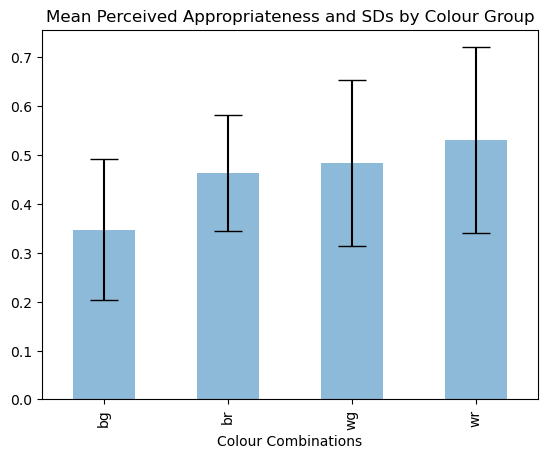

In [377]:
group_means_2.plot(kind = 'bar', yerr = group_errors, alpha = 0.5, capsize = 10)
plt.xlabel('Colour Combinations')
plt.title('Mean Perceived Appropriateness and SDs by Colour Group')

In [378]:
group_errors_2

group
bg    0.212901
br    0.188823
wg    0.326687
wr    0.345326
Name: value, dtype: float64

In [379]:
# Split the 'two_letters' column into two separate columns
means_q2['background'] = means_q2['group'].str[0]
means_q2['line'] = means_q2['group'].str[1]

means_q2 = means_q2.drop('group', axis=1)

means_q2

,col,value,background,line
0,0,0.550926,w,g
1,0,0.550926,w,r
2,0,0.652778,b,g
3,0,0.627315,b,r
4,1,0.238889,w,g
5,1,0.168519,w,r
6,1,0.381469,b,g
7,1,0.222222,b,r
8,2,0.000000,w,g
9,2,1.000000,w,r


In [380]:
grouped_data = means_q2.groupby(['background', 'line'])
group_means = grouped_data['value'].mean()
group_errors_2 = grouped_data['value'].std()
group_means

background  line
b           g       0.347483
            r       0.463161
w           g       0.484193
            r       0.530820
Name: value, dtype: float64

In [381]:
group_means = grouped_data.mean()
pd.DataFrame(group_means)

value
background line          
b          g     0.347483
           r     0.463161
w          g     0.484193
           r     0.530820

In [382]:
data_to_plot = pd.DataFrame(group_means).reset_index()
data_to_plot

,background,line,value
0,b,g,0.347483
1,b,r,0.463161
2,w,g,0.484193
3,w,r,0.530820


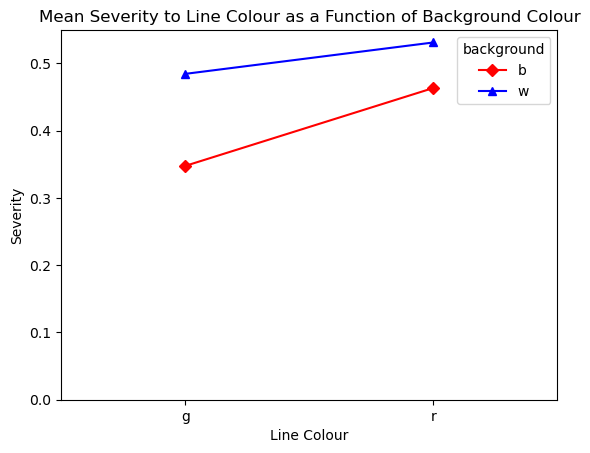

In [383]:
my_interaction_plot = interaction_plot(x=data_to_plot['line'], trace=data_to_plot['background'], 
                                       response=data_to_plot['value'], colors=['red', 'blue'], 
                                       markers=['D', '^'])
plt.xlabel('Line Colour')
plt.ylabel('Severity')
plt.title('Mean Severity to Line Colour as a Function of Background Colour')
plt.ylim(0)
plt.margins(.5, 1)

In [384]:
factorial_model = AnovaRM(data=means_q2, depvar='value', within=['background', 'line'], subject='col').fit()
print(factorial_model)

                   Anova
                F Value Num DF Den DF Pr > F
--------------------------------------------
background       1.2548 1.0000 6.0000 0.3055
line             0.3225 1.0000 6.0000 0.5907
background:line  0.1535 1.0000 6.0000 0.7087



In [386]:
index = (means_q2['background']=='b') & (means_q2['line']=='g')
BG = means_q2[index]['value']

In [387]:
index = (means_q2['background']=='w') & (means_q2['line']=='g')
WG = means_q2[index]['value']

In [388]:
index = (means_q2['background']=='b') & (means_q2['line']=='r')
BR = means_q2[index]['value']

In [389]:
index = (means_q2['background']=='w') & (means_q2['line']=='r')
WR = means_q2[index]['value']

In [394]:
stats.ttest_rel(BG, WG)

Ttest_relResult(statistic=-1.2058653048601018, pvalue=0.273259497085437)

In [395]:
stats.ttest_rel(BR, WR) 

Ttest_relResult(statistic=-0.486806597560625, pvalue=0.6436666652890093)

In [396]:
stats.ttest_rel(WG, WR)

Ttest_relResult(statistic=-0.20895144303378171, pvalue=0.8413995238263647)

In [397]:
stats.ttest_rel(BG, BR)

Ttest_relResult(statistic=-1.426558579053006, pvalue=0.20360503978278244)

In [398]:
stats.ttest_rel(WG, BR)

Ttest_relResult(statistic=0.14479016868237185, pvalue=0.8896177851718825)

In [399]:
stats.ttest_rel(BG, WR)

Ttest_relResult(statistic=-0.961110930648368, pvalue=0.3736119175046341)